In [1]:
import pandas as pd
from insight_utils import print_prediction, line_plot_column, bar_groups_chart, box_plot, grouped_box_plot

#### Data

In [2]:
initial_path = "results/gpt-3.5-turbo-16k/initial/"
modifiers_path = "results/gpt-3.5-turbo-16k/with modifiers/"

########## INITIAL ##########
base_prompt_df = pd.read_csv(initial_path + "base_prompt.csv")
description_df = pd.read_csv(initial_path + "description.csv")
follow_up_df = pd.read_csv(initial_path + "follow_up.csv")
headings_first_df = pd.read_csv(initial_path + "headings_first.csv")
important_parts_df = pd.read_csv(initial_path + "important_parts.csv")
improve_df = pd.read_csv(initial_path + "improve.csv")
persona_df = pd.read_csv(initial_path + "persona.csv")
repeat_df = pd.read_csv(initial_path + "repeat.csv")
step_by_step_df = pd.read_csv(initial_path + "step_by_step.csv")
template_df = pd.read_csv(initial_path + "template.csv")
topic_df = pd.read_csv(initial_path + "topic.csv")
analyze_main_themes_df = pd.read_csv(initial_path + "analyze_main_themes.csv")
main_points_df = pd.read_csv(initial_path + "main_points.csv")
in_context_df = pd.read_csv(initial_path + "in_context.csv")

########## MODIFIERS ##########
mod_base_prompt_df = pd.read_csv(modifiers_path + "base_prompt.csv")
mod_description_df = pd.read_csv(modifiers_path + "description.csv")
mod_follow_up_df = pd.read_csv(modifiers_path + "follow_up.csv")
mod_headings_first_df = pd.read_csv(modifiers_path + "headings_first.csv")
mod_important_parts_df = pd.read_csv(modifiers_path + "important_parts.csv")
mod_improve_df = pd.read_csv(modifiers_path + "improve.csv")
mod_persona_df = pd.read_csv(modifiers_path + "persona.csv")
mod_repeat_df = pd.read_csv(modifiers_path + "repeat.csv")
mod_step_by_step_df = pd.read_csv(modifiers_path + "step_by_step.csv")
mod_template_df = pd.read_csv(modifiers_path + "template.csv")
mod_topic_df = pd.read_csv(modifiers_path + "topic.csv")
mod_analyze_main_themes_df = pd.read_csv(modifiers_path + "analyze_main_themes.csv")
mod_main_points_df = pd.read_csv(modifiers_path + "main_points.csv")
mod_in_context_df = pd.read_csv(modifiers_path + "in_context.csv")

dataframes = [base_prompt_df, mod_base_prompt_df, description_df, mod_description_df,
              follow_up_df, mod_follow_up_df, headings_first_df, mod_headings_first_df, 
              important_parts_df, mod_important_parts_df, improve_df, mod_improve_df, 
              persona_df, mod_persona_df, repeat_df, mod_repeat_df, 
              step_by_step_df, mod_step_by_step_df, template_df, mod_template_df, 
              topic_df, mod_topic_df, analyze_main_themes_df, mod_analyze_main_themes_df,
              main_points_df, mod_main_points_df, in_context_df, mod_in_context_df]
patterns = ["base_prompt", "description", "follow_up", "headings_first", "important_parts",
            "improve", "persona", "repeat", "step_by_step", "template", "topic", "analyze_main_themes",
            "main_points", "in_context"]

metrics = [
        "rouge_1",
        "rouge_2",
        "rouge_L",
        "bert_score",
        "long_bullets",
        "long_subheadings",
        "contradiction_ratio",
        "number_hallucinations",
        "three_by_three",
        "errors",
        "geval_fluency",
        "geval_relevance",
        "geval_coherence",
        "geval_consistency",
    ]
    
titles = ["How AI could empower any business", "Pussy Riot's powerful message to Vladimir Putin", "What's next in 3D printing"]




In [3]:
dic = {}

for i, df in enumerate(dataframes):
    success_rate = (df["three_by_three"].sum() / len(df.index)) * 100
    
    prompt = patterns[i//2] if i % 2 == 0 else patterns[i//2] + " with modifiers"
    dic.update({prompt: round(success_rate)})

sorted_dic = dict(sorted(dic.items(), key=lambda item: item[1], reverse=True))
result_df = pd.DataFrame(sorted_dic.items(),columns=["Prompt", "Three-By-Three (%)"])

print(result_df.style.to_latex())

\begin{tabular}{llr}
 & Prompt & Three-By-Three (%) \\
0 & topic with modifiers & 100 \\
1 & headings_first & 98 \\
2 & headings_first with modifiers & 98 \\
3 & improve with modifiers & 98 \\
4 & analyze_main_themes & 98 \\
5 & analyze_main_themes with modifiers & 98 \\
6 & important_parts with modifiers & 97 \\
7 & base_prompt & 96 \\
8 & improve & 96 \\
9 & topic & 96 \\
10 & repeat & 93 \\
11 & main_points & 93 \\
12 & base_prompt with modifiers & 91 \\
13 & persona & 91 \\
14 & template & 91 \\
15 & persona with modifiers & 84 \\
16 & repeat with modifiers & 84 \\
17 & main_points with modifiers & 84 \\
18 & step_by_step with modifiers & 83 \\
19 & description with modifiers & 80 \\
20 & important_parts & 73 \\
21 & step_by_step & 71 \\
22 & template with modifiers & 71 \\
23 & follow_up with modifiers & 69 \\
24 & description & 67 \\
25 & follow_up & 61 \\
26 & in_context with modifiers & 45 \\
27 & in_context & 39 \\
\end{tabular}



In [4]:
dic2 = {}

for i, df in enumerate(dataframes):
    count = 0
    for j, row in df.iterrows():
        if row["three_by_three"] == 1 and row["errors"] < 2 and row["long_bullets"] > 3 and row["long_subheadings"] > 2:
            count += 1
    # success_rate = (df["three_by_three"].sum() / len(df.index)) * 100
    
    
    prompt = patterns[i//2] if i % 2 == 0 else patterns[i//2] + " with modifiers"
    execution_accuracy =  count / len(df.index) * 100
    dic2.update({prompt: round(execution_accuracy)})

sorted_dic = dict(sorted(dic2.items(), key=lambda item: item[1], reverse=True))
result_df = pd.DataFrame(sorted_dic.items(),columns=["Prompt", "Execution Accuracy (%)"])

print(result_df.style.to_latex())

\begin{tabular}{llr}
 & Prompt & Execution Accuracy (%) \\
0 & analyze_main_themes with modifiers & 31 \\
1 & important_parts & 29 \\
2 & analyze_main_themes & 29 \\
3 & headings_first & 24 \\
4 & improve & 24 \\
5 & topic & 22 \\
6 & main_points with modifiers & 21 \\
7 & base_prompt & 20 \\
8 & main_points & 18 \\
9 & follow_up & 17 \\
10 & repeat & 16 \\
11 & step_by_step & 16 \\
12 & important_parts with modifiers & 13 \\
13 & base_prompt with modifiers & 11 \\
14 & persona & 11 \\
15 & repeat with modifiers & 11 \\
16 & topic with modifiers & 11 \\
17 & description & 9 \\
18 & improve with modifiers & 9 \\
19 & template & 9 \\
20 & persona with modifiers & 7 \\
21 & follow_up with modifiers & 4 \\
22 & step_by_step with modifiers & 3 \\
23 & description with modifiers & 2 \\
24 & headings_first with modifiers & 2 \\
25 & template with modifiers & 2 \\
26 & in_context & 0 \\
27 & in_context with modifiers & 0 \\
\end{tabular}



d:\Program Files\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]["pattern"] = patterns[i // 2]
c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]["pattern"] = patterns[i // 2]
c:\Users\Erlend\git\gpt-prompt-engineering\insight_

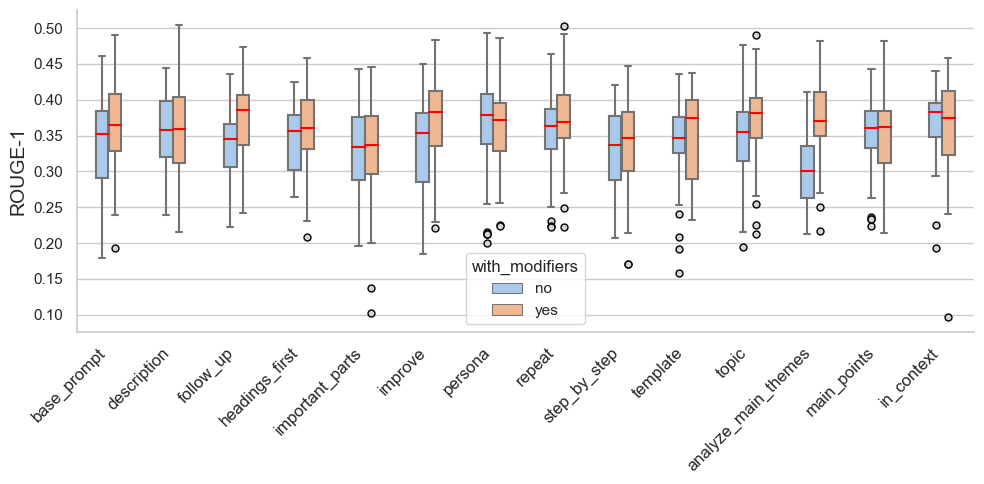

d:\Program Files\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]["pattern"] = patterns[i // 2]
c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]["pattern"] = patterns[i // 2]
c:\Users\Erlend\git\gpt-prompt-engineering\insight_

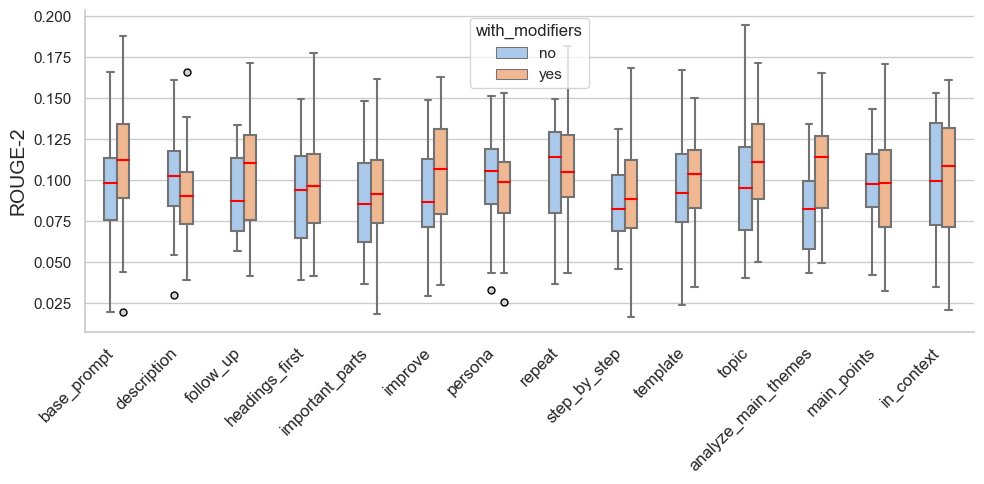

d:\Program Files\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]["pattern"] = patterns[i // 2]
c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]["pattern"] = patterns[i // 2]
c:\Users\Erlend\git\gpt-prompt-engineering\insight_

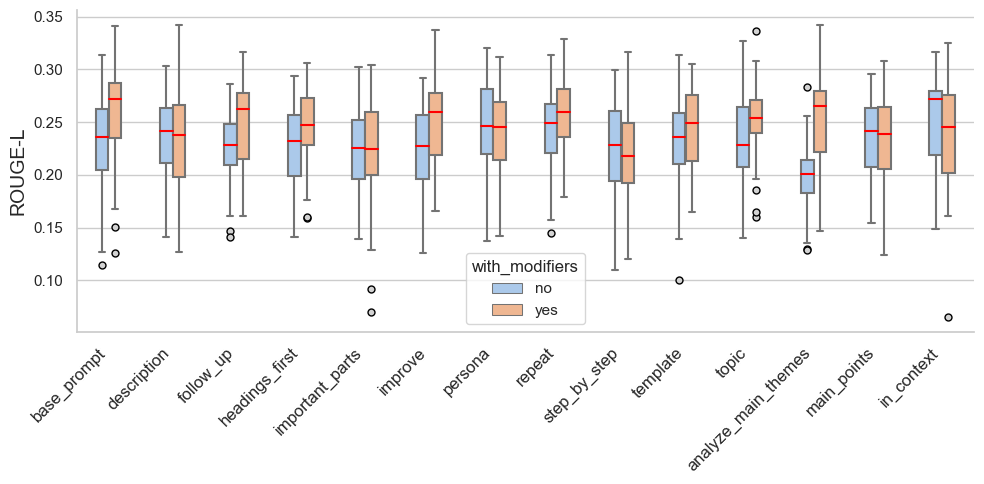

d:\Program Files\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]["pattern"] = patterns[i // 2]
c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]["pattern"] = patterns[i // 2]
c:\Users\Erlend\git\gpt-prompt-engineering\insight_

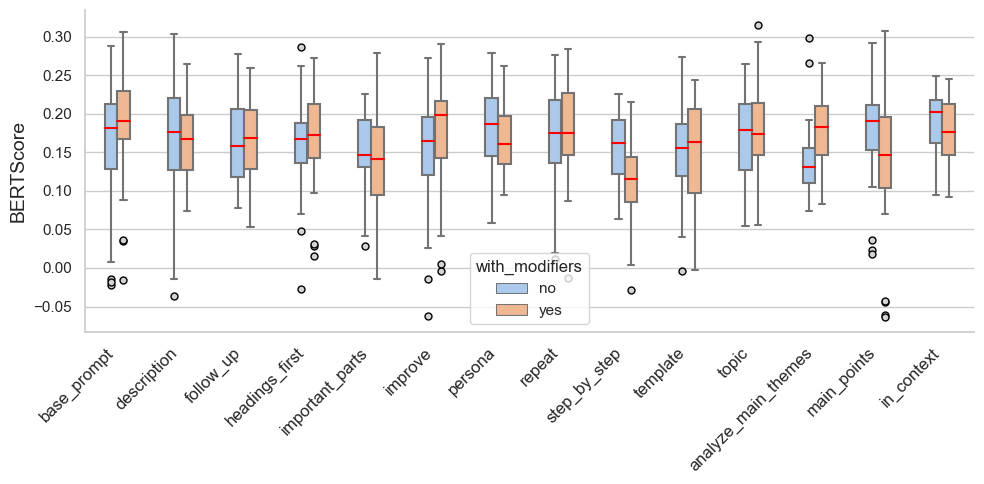

c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]["pattern"] = patterns[i // 2]
c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]["pattern"] = patterns[i // 2]
c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

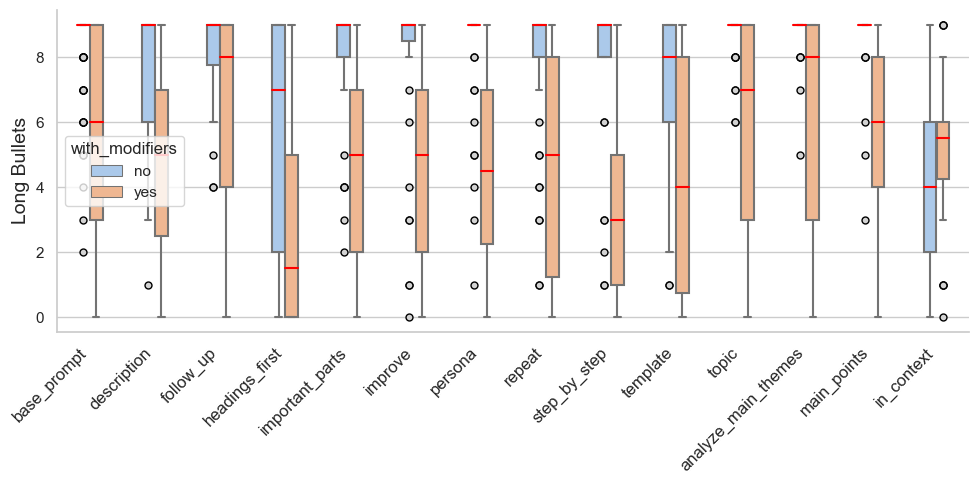

c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]["pattern"] = patterns[i // 2]
c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]["pattern"] = patterns[i // 2]
c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

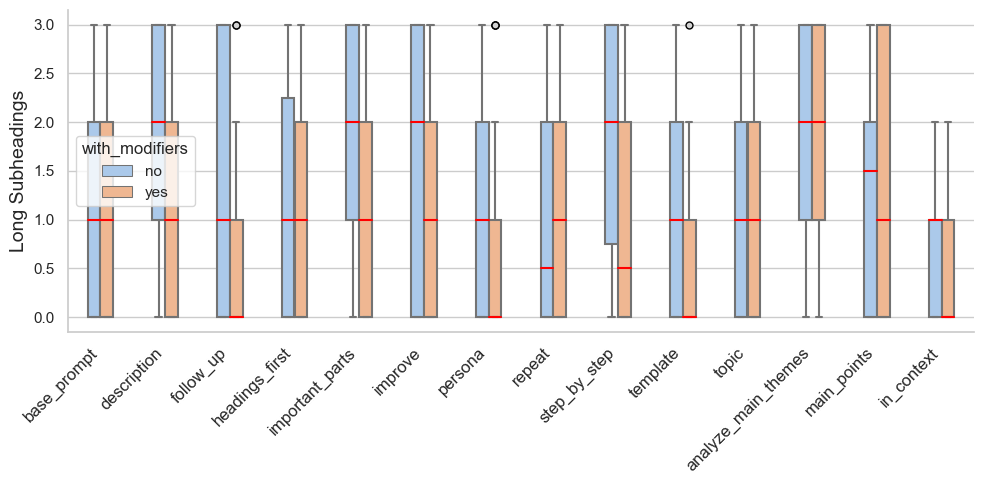

c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]["pattern"] = patterns[i // 2]
c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]["pattern"] = patterns[i // 2]
c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

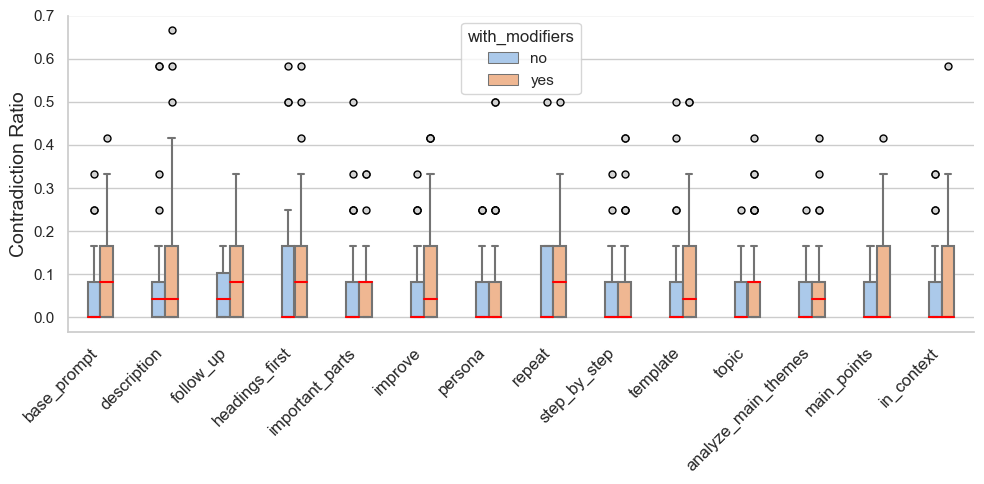

c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]["pattern"] = patterns[i // 2]
c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]["pattern"] = patterns[i // 2]
c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

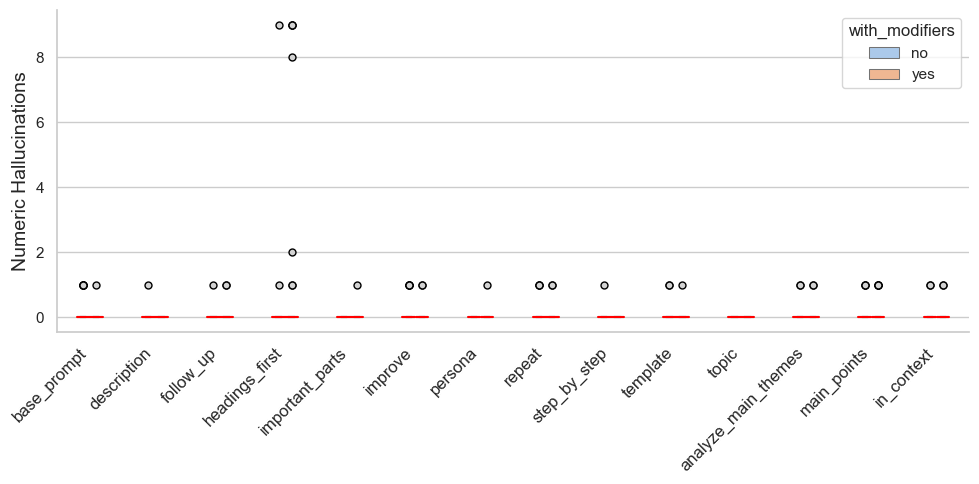

c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]["pattern"] = patterns[i // 2]
c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]["pattern"] = patterns[i // 2]
c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

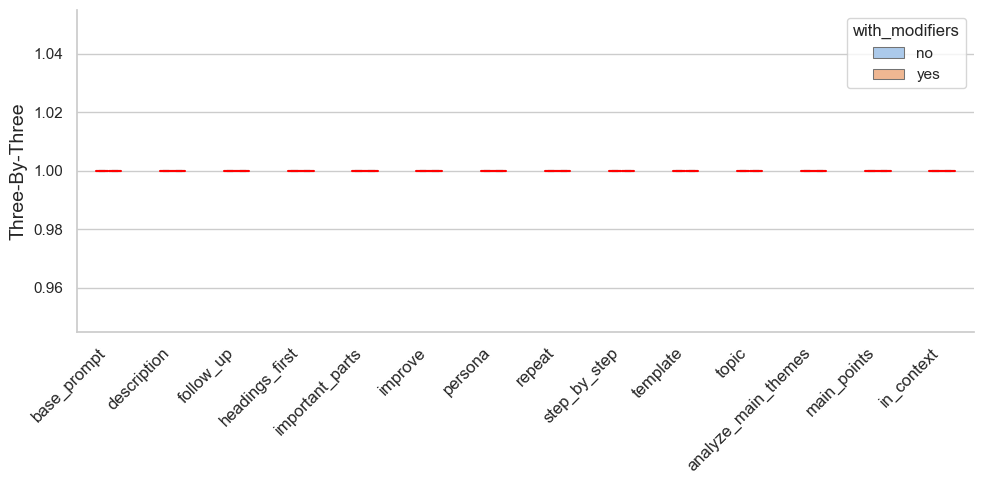

c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]["pattern"] = patterns[i // 2]
c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]["pattern"] = patterns[i // 2]
c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

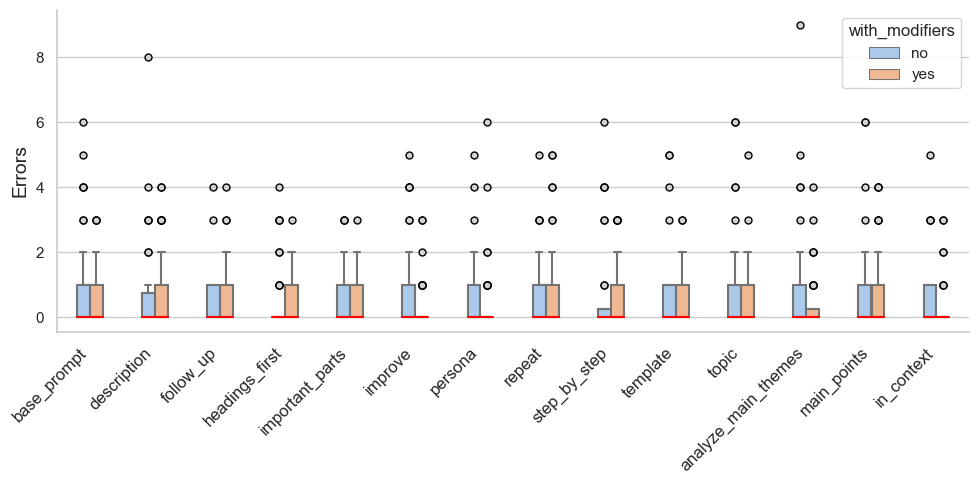

c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]["pattern"] = patterns[i // 2]
c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]["pattern"] = patterns[i // 2]
c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

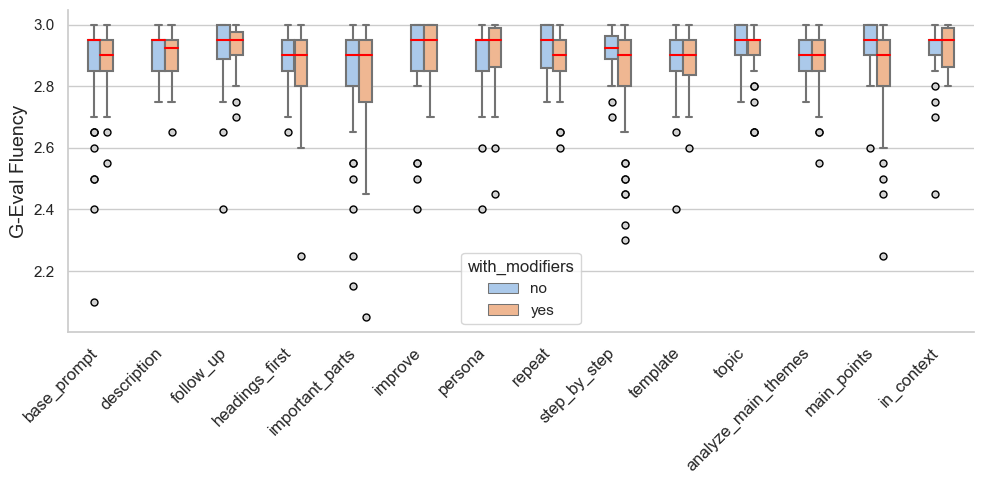

c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]["pattern"] = patterns[i // 2]
c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]["pattern"] = patterns[i // 2]
c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

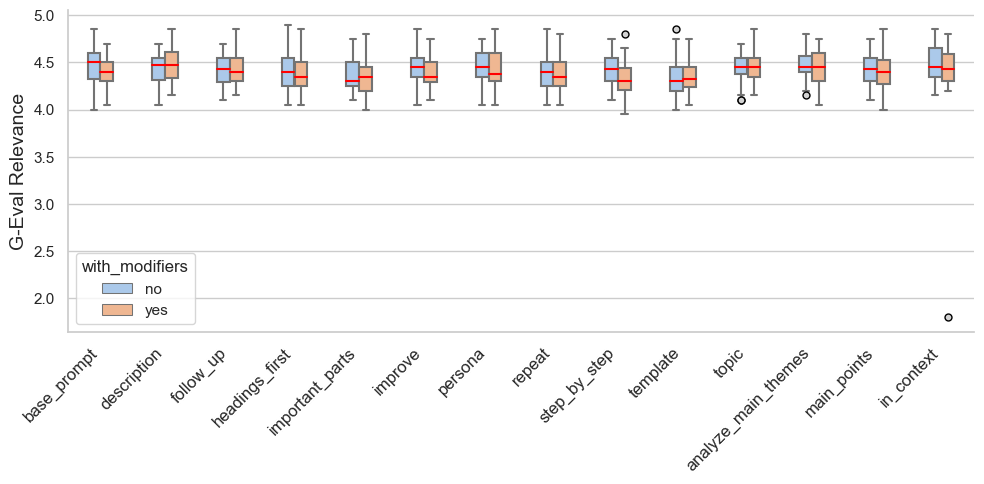

c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]["pattern"] = patterns[i // 2]
c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]["pattern"] = patterns[i // 2]
c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

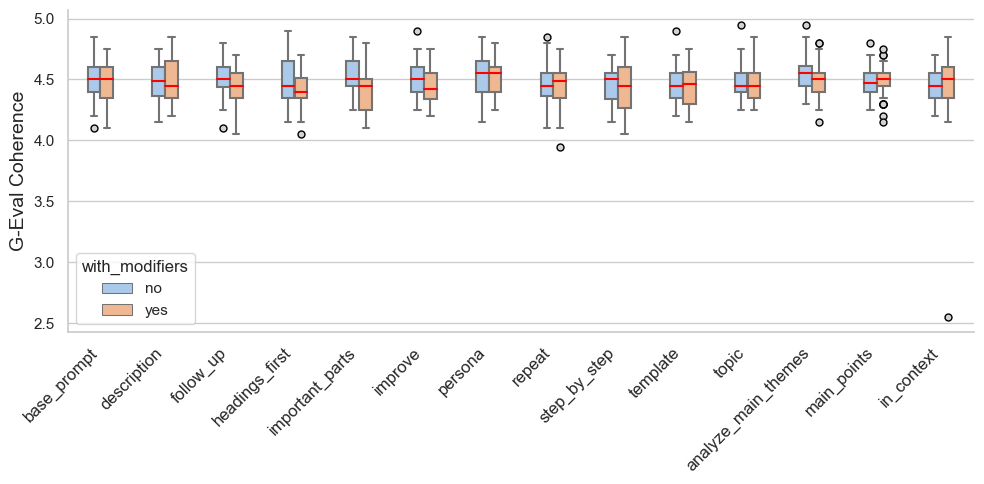

c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]["pattern"] = patterns[i // 2]
c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]["pattern"] = patterns[i // 2]
c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

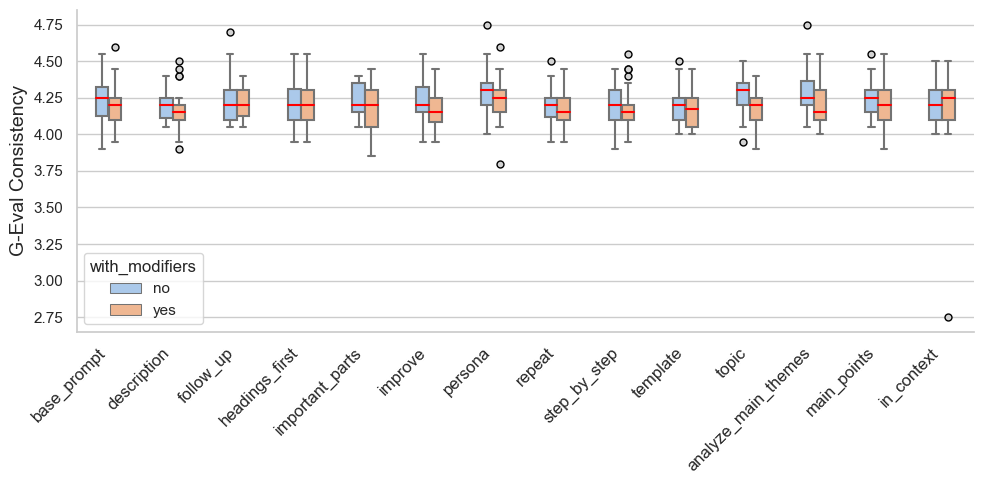

In [5]:
# for df in dataframes:
#     df = df[df["three_by_three"] == 1]

for metric in metrics:
    grouped_box_plot(dataframes, patterns, metric, width=10, height=5)